# Creating pie charts of the neuropils that occur in each cluster of the modularity data
- This will be done for combined, input and output networks


In [40]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from util import *

In [41]:
# Import files
hemibrain_version = "v1.2.1"
direct = "oviIN_combined/preprocessed-" + hemibrain_version
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
full = pd.read_csv(os.path.join(direct, filename),index_col=0)
log_msg("Adding 'type group'")
full['celltype'].fillna('None', inplace=True)
full["type_group"] = full["celltype"].apply(simplify_type)
log_msg("Done!")
full.head()

2024 02 06 13:45:01  Loading node dataframe
2024 02 06 13:45:02  Adding 'type group'
2024 02 06 13:45:02  Done!


,key,0.0,0.1,0.25,0.5,0.75,instance,celltype,pre,post,...,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois,type_group
id,,,,,,,,,,,,,,,,,,,,,
1003215282,1,1,1,1,1,1,CL229_R,CL229,100,439,...,False,Roughly traced,PDM19,301.0,"[23044, 14981, 11600]","{'INP': {'pre': 87, 'post': 351, 'downstream':...",NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",CL
1005952640,2,1,2,2,2,2,IB058_R,IB058,664,2047,...,False,Roughly traced,PVL20,NaN,NaN,"{'INP': {'pre': 464, 'post': 1327, 'downstream...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...",IB
1006928515,3,1,2,2,3,3,CL300_R,CL300,86,173,...,False,Roughly traced,PVL13,236.0,"[12083, 10523, 16816]","{'INP': {'pre': 79, 'post': 126, 'downstream':...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",CL
1007260806,4,1,1,1,4,4,CL301_R,CL301,119,226,...,False,Roughly traced,PVL13,236.0,"[13524, 10108, 16480]","{'INP': {'pre': 40, 'post': 128, 'downstream':...",NaN,"['GOR(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['IB', 'ICL(R)', 'INP', 'PLP(R)', 'SCL(R)', 'S...",CL
1007308577,5,2,3,2,5,5,NaN,None,54,2740,...,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 5, 'post': 486, 'downstream...",NaN,"['ATL(L)', 'ATL(R)', 'GOR(L)', 'IB', 'ICL(L)',...","['ATL(L)', 'ATL(R)', 'IB', 'ICL(R)', 'INP', 'S...",None


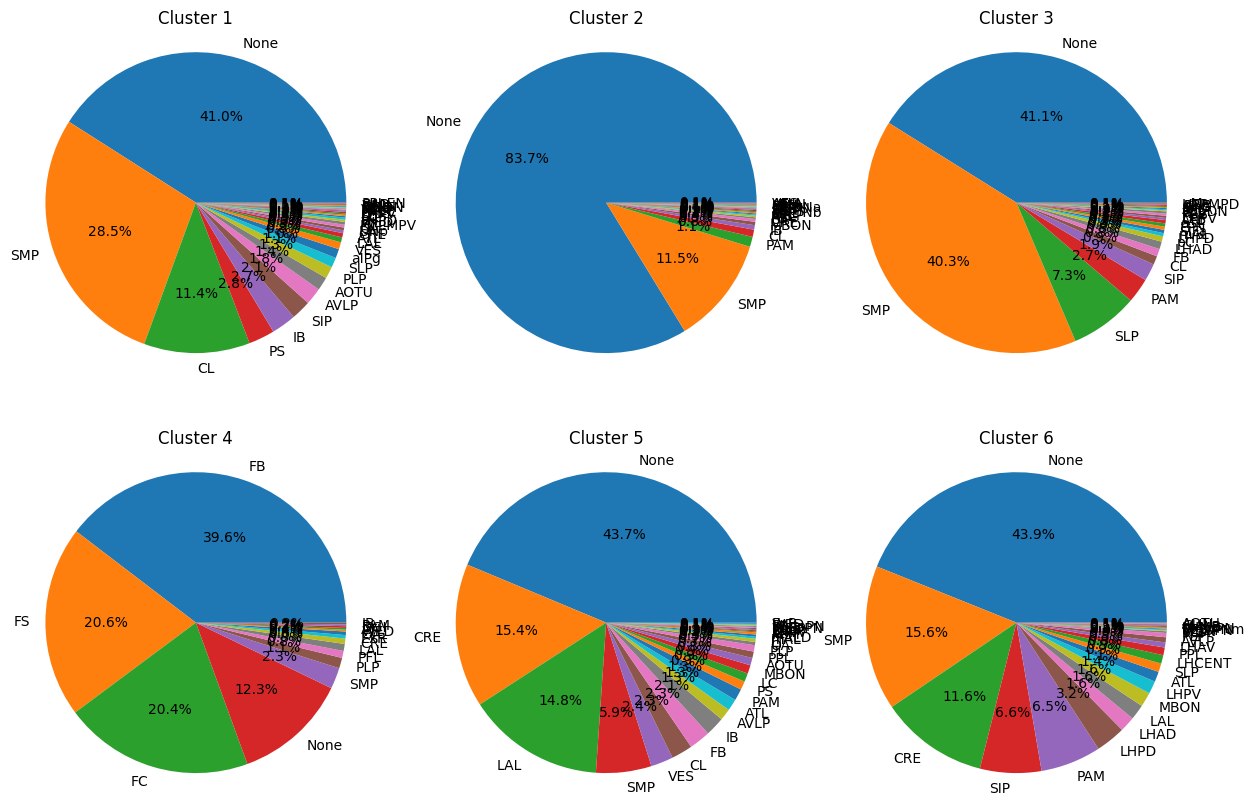

In [42]:
# Plots each cluster in a pie chart
cluster_list = [1,2,3,4,5,6] # create cluster list

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i in cluster_list: 
    cluster = full[full['0.0'] == i] # create cluster dataframe
    # Filter data so that None is excluded and there is a cutoff of 3
    data = cluster['type_group'].value_counts()
    #data = data[data.index != 'None']
    #data = data[data > 3]
    # plot pie chart by value counts without none
    ax[int((i-1)/3), (i-1)%3].pie(data, labels = data.index, autopct='%1.1f%%', radius=1.10)
    ax[int((i-1)/3), (i-1)%3].set_title('Cluster ' + str(i))

## Repeat for inputs

In [43]:
hemibrain_version = "v1.2.1"
direct = "oviIN_combined/preprocessed_inputs-" + hemibrain_version
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
inputs = pd.read_csv(os.path.join(direct, filename),index_col=0)
log_msg("Adding 'type group'")
inputs['celltype'].fillna('None', inplace=True)
inputs["type_group"] = inputs["celltype"].apply(simplify_type)
log_msg("Done!")

2024 02 06 13:45:18  Loading node dataframe
2024 02 06 13:45:18  Adding 'type group'
2024 02 06 13:45:18  Done!


In [44]:
check = inputs[inputs['0.0'] == 5]
data = check['type_group'].value_counts()
#data = data[data.index != 'None']
#data = data[data > 5]

In [45]:
data

type_group
None     740
SMP      134
CL         6
MBON       4
IB         3
CRE        3
AVLP       2
LNd        2
DNp        1
PAM        1
LAL        1
pC         1
aMe        1
LPN        1
oviIN      1
SIP        1
OA         1
Name: count, dtype: int64

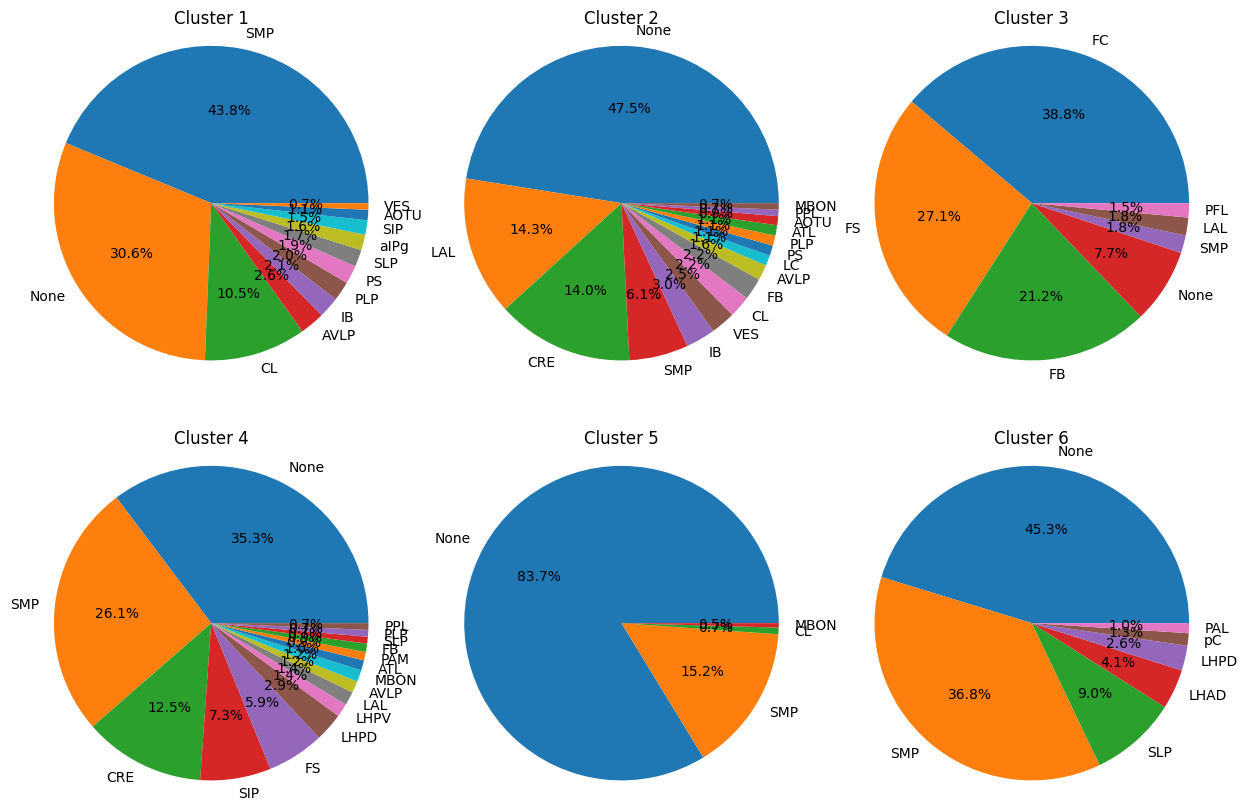

In [46]:
# Plots each cluster in a pie chart
cluster_list = [1,2,3,4,5,6] # create cluster list

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i in cluster_list: 
    cluster = inputs[inputs['0.0'] == i] # create cluster dataframe
    # Filter data so that None is excluded and there is a cutoff of 5
    data = cluster['type_group'].value_counts()
    #data = data[data.index != 'None']
    data = data[data > 3]
    # plot pie chart by value counts without none
    ax[int((i-1)/3), (i-1)%3].pie(data, labels = data.index, autopct='%1.1f%%',radius=1.15)
    ax[int((i-1)/3), (i-1)%3].set_title('Cluster ' + str(i))

## Repeat for outputs

In [47]:
hemibrain_version = "v1.2.1"
direct = "oviIN_combined/preprocessed_outputs-" + hemibrain_version
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
outputs = pd.read_csv(os.path.join(direct, filename),index_col=0)
log_msg("Adding 'type group'")
outputs['celltype'].fillna('None', inplace=True)
outputs["type_group"] = outputs["celltype"].apply(simplify_type)
log_msg("Done!")

2024 02 06 13:45:31  Loading node dataframe
2024 02 06 13:45:31  Adding 'type group'
2024 02 06 13:45:31  Done!


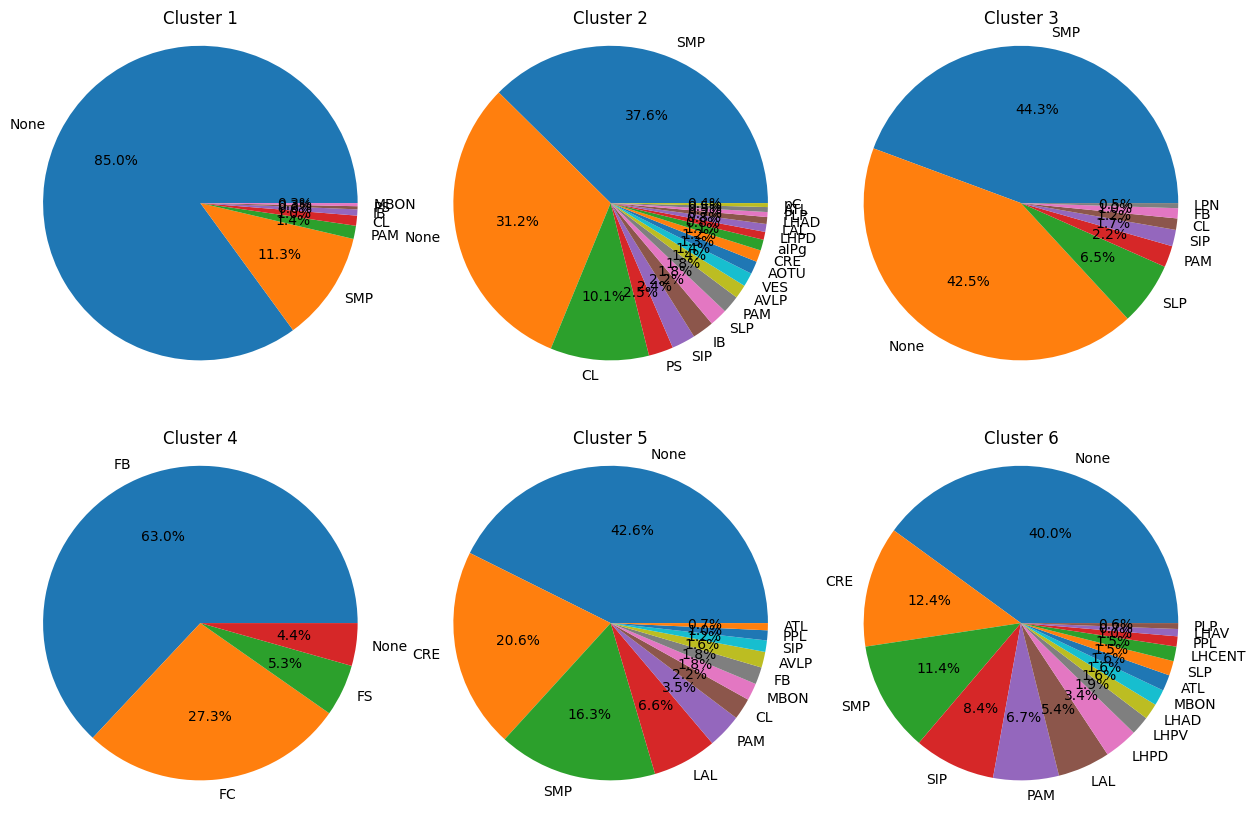

In [48]:
# Plots each cluster in a pie chart
cluster_list = [1,2,3,4,5,6] # create cluster list

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i in cluster_list: 
    cluster = outputs[outputs['0.0'] == i] # create cluster dataframe
    # Filter data so that None is excluded and there is a cutoff of 5
    data = cluster['type_group'].value_counts()
    #data = data[data.index != 'None']
    data = data[data > 3]
    # plot pie chart by value counts without none
    ax[int((i-1)/3), (i-1)%3].pie(data, labels = data.index, autopct='%1.1f%%', radius=1.15)
    ax[int((i-1)/3), (i-1)%3].set_title('Cluster ' + str(i))

# Creating the whole brain piecharts as a reference


In [49]:
# Import files
hemibrain_version = "v1.2"
direct = "hemibrain/preprocessed-" + hemibrain_version
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
wb = pd.read_csv(os.path.join(direct, filename),index_col=0)
log_msg("Adding 'type group'")
wb['celltype'].fillna('None', inplace=True)
wb["type_group"] = wb["celltype"].apply(simplify_type)
log_msg("Done!")
wb.head()

2024 02 06 13:45:32  Loading node dataframe
2024 02 06 13:45:32  Adding 'type group'
2024 02 06 13:45:32  Done!


,0.75,0.05,0.1,0.25,0.5,1.0,0.0,instance,celltype,pre,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,inputRois,outputRois,roiInfo,type_group
id,,,,,,,,,,,,,,,,,,,,,
200326126,1,1,1,1,1,1,1,CL141_L,CL141,395,...,Traced,False,Roughly traced,PDL20,251.0,"[3844, 14565, 15568]","['AVLP(R)', 'IB', 'ICL(R)', 'INP', 'LH(R)', 'M...","['AVLP(R)', 'ICL(R)', 'INP', 'LH(R)', 'MB(+ACA...","{'SNP(R)': {'pre': 17, 'post': 19, 'downstream...",CL
202916528,2,2,2,2,2,2,2,FS4C(FQ12)_C4_R,FS4C,95,...,Traced,False,Roughly traced,PDM03,301.0,"[20091, 12266, 12208]","['CX', 'FB', 'FB-column3', 'FBl1', 'FBl2', 'FB...","['CX', 'FB', 'FBl7', 'SMP(L)', 'SNP(L)']","{'SNP(L)': {'pre': 93, 'post': 35, 'downstream...",FS
203253072,3,2,3,3,3,3,2,FS4A(AB)(FQ12)_C3_R,FS4A,62,...,Traced,False,Roughly traced,PDM03,236.0,"[17809, 10233, 14208]","['AB(R)', 'CRE(-RUB)(L)', 'CRE(L)', 'CX', 'FB'...","['AB(R)', 'CX', 'FB', 'FB-column3', 'FBl1', 'F...","{'SNP(L)': {'pre': 52, 'post': 30, 'downstream...",FS
203253253,4,3,3,4,4,4,2,SMP505(PDM22)_L,SMP505,415,...,Traced,False,Roughly traced,NaN,351.0,"[32168, 13757, 13336]","['ATL(L)', 'CRE(-RUB)(L)', 'CRE(L)', 'ICL(L)',...","['SIP(L)', 'SIP(R)', 'SLP(R)', 'SMP(L)', 'SMP(...","{'SNP(L)': {'pre': 150, 'post': 2282, 'downstr...",SMP
203257652,5,2,3,2,2,2,2,FS4C(FQ12)_C6_R,FS4C,65,...,Traced,False,Roughly traced,PDM02,301.0,"[22758, 16749, 10240]","['CX', 'FB', 'FBl1', 'FBl2', 'FBl3', 'FBl4', '...","['SIP(L)', 'SMP(L)', 'SNP(L)']","{'SNP(L)': {'pre': 65, 'post': 36, 'downstream...",FS


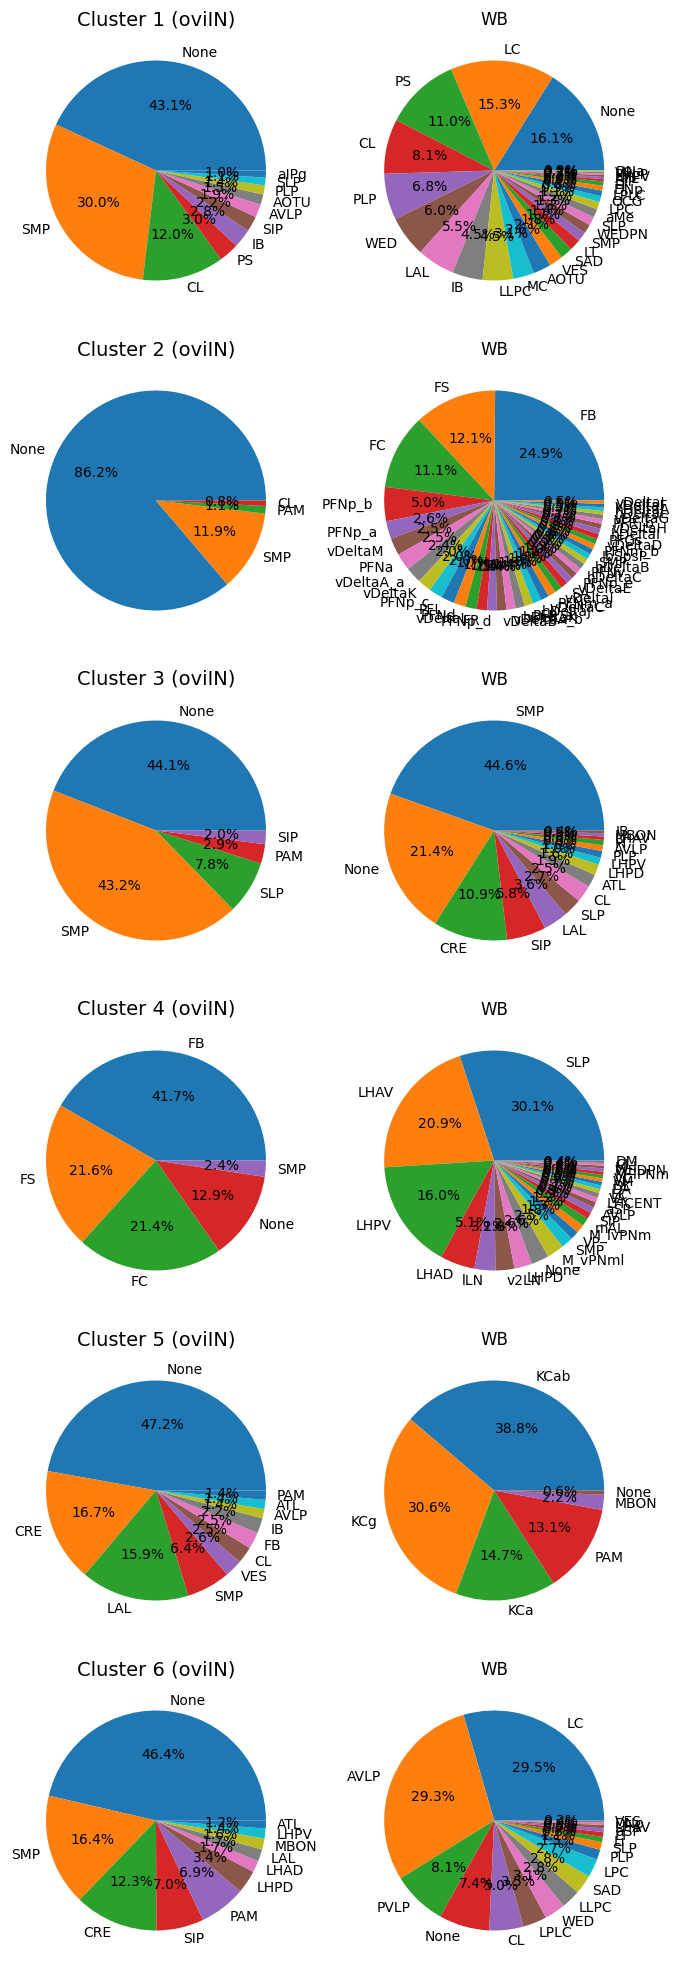

In [50]:
# Plots each cluster in a pie chart
cluster_list = [1,2,3,4,5,6] # create cluster list
mod_list = [full, wb]
mod_list_string = ['Full', 'WB']

def filter_data(cluster):
    data = cluster['type_group'].value_counts()
    #data = data[data.index != 'None']
    data = data[data > 10]
    return data
def create_sideplot():
    fig, ax = plt.subplots(6, 2, figsize=(8, 25))
    for idx, k in enumerate(cluster_list):
        for i, aspect in enumerate(mod_list):
            cluster = aspect[aspect['0.0'] == k] # create cluster dataframe
            # Filter data so that None is excluded and there is a cutoff of 3
            data = filter_data(cluster)
            # plot pie chart by value counts without none
            ax[idx, i].pie(data, labels = data.index, autopct='%1.1f%%', radius=1)
            ax[idx, i].set_title(mod_list_string[i])
        ax[idx, 0].set_title(f'Cluster {k} ' + '(oviIN)', fontsize=14)

create_sideplot()

In [51]:
wb.index

Index([ 200326126,  202916528,  203253072,  203253253,  203257652,  203594169,
        203594175,  203598499,  203598504,  203598542,
       ...
       5901231246, 5901231325, 5901232053, 6400000773, 7112579848, 7112579856,
       7112615127, 7112617294, 7112622044, 7112622236],
      dtype='int64', name='id', length=21739)

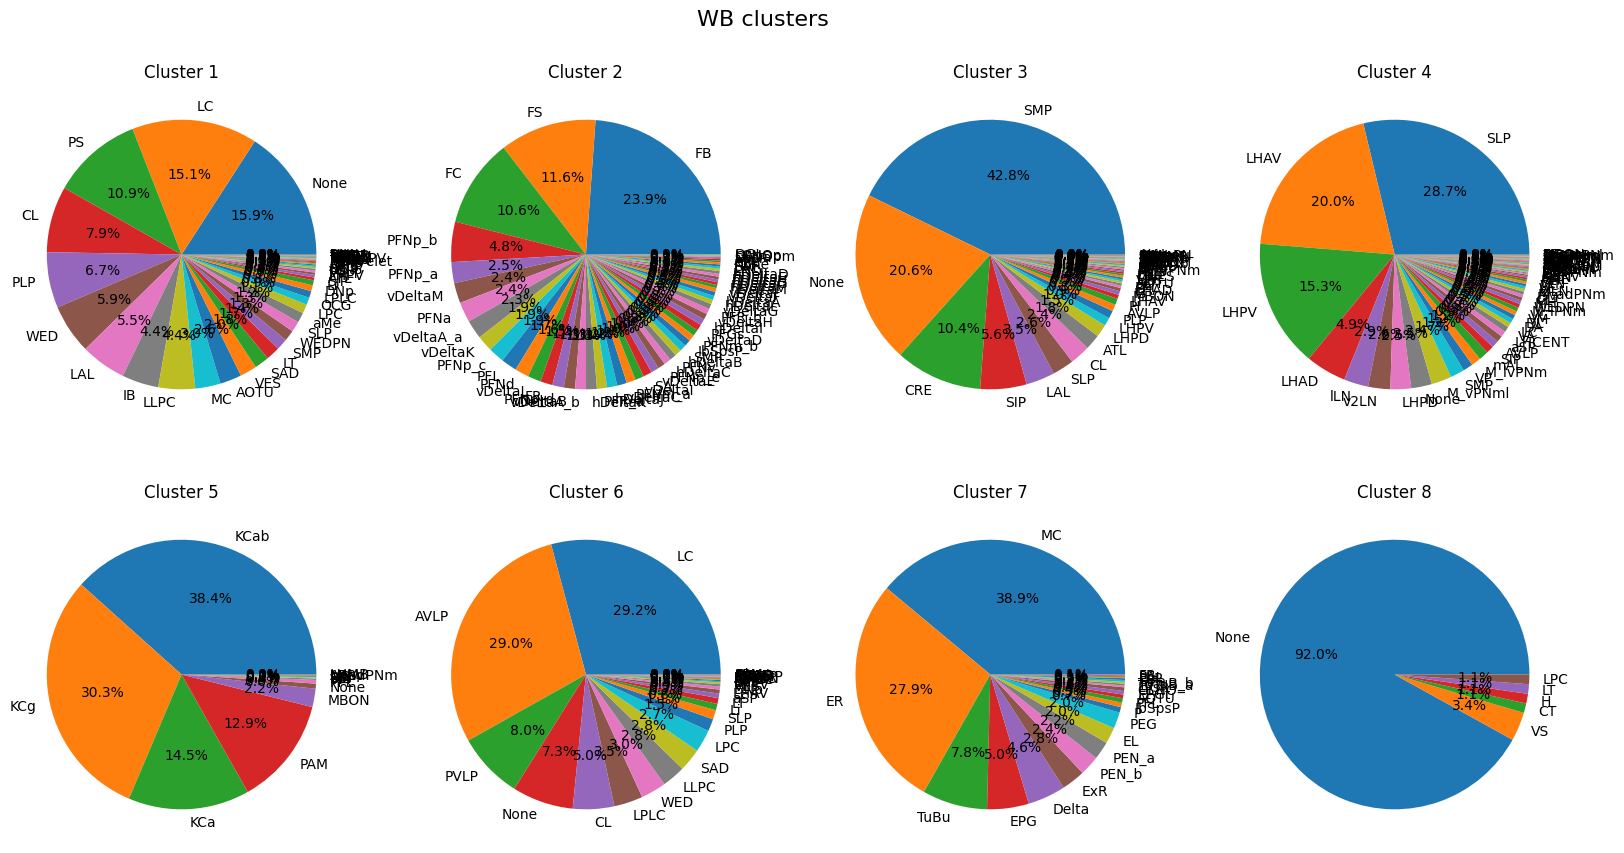

In [59]:
# Plots each cluster of wb in a pie chart
cluster_list = [1,2,3,4,5,6,7,8] # create cluster list

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i in cluster_list: 
    cluster = wb[wb['0.0'] == i] # create cluster dataframe
    # Filter data so that None is excluded and there is a cutoff of 5
    data = cluster['type_group'].value_counts()
    #data = data[data.index != 'None']
    #data = data[data > 10]
    # plot pie chart by value counts without none
    ax[int((i-1)/4), (i-1)%4].pie(data, labels = data.index, autopct='%1.1f%%',radius=1.0)
    ax[int((i-1)/4), (i-1)%4].set_title('Cluster ' + str(i))
    fig.suptitle('WB clusters', fontsize=16, y=.95)